### Descrição

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import time

In [2]:
df = pd.read_csv('../Data/facies_vectors.csv')
print(df.shape)
df.head()

(4149, 11)


,Facies,Formation,Well Name,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,NM_M,RELPOS
0,3,A1 SH,SHRIMPLIN,2793.0,77.45,0.664,9.9,11.915,4.6,1,1.000
1,3,A1 SH,SHRIMPLIN,2793.5,78.26,0.661,14.2,12.565,4.1,1,0.979
2,3,A1 SH,SHRIMPLIN,2794.0,79.05,0.658,14.8,13.050,3.6,1,0.957
3,3,A1 SH,SHRIMPLIN,2794.5,86.10,0.655,13.9,13.115,3.5,1,0.936
4,3,A1 SH,SHRIMPLIN,2795.0,74.58,0.647,13.5,13.300,3.4,1,0.915


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4149 entries, 0 to 4148
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Facies     4149 non-null   int64  
 1   Formation  4149 non-null   object 
 2   Well Name  4149 non-null   object 
 3   Depth      4149 non-null   float64
 4   GR         4149 non-null   float64
 5   ILD_log10  4149 non-null   float64
 6   DeltaPHI   4149 non-null   float64
 7   PHIND      4149 non-null   float64
 8   PE         3232 non-null   float64
 9   NM_M       4149 non-null   int64  
 10  RELPOS     4149 non-null   float64
dtypes: float64(7), int64(2), object(2)
memory usage: 356.7+ KB


In [4]:
100*df.isnull().sum()/df.shape[0]

Facies        0.000000
Formation     0.000000
Well Name     0.000000
Depth         0.000000
GR            0.000000
ILD_log10     0.000000
DeltaPHI      0.000000
PHIND         0.000000
PE           22.101711
NM_M          0.000000
RELPOS        0.000000
dtype: float64

In [5]:
df[df['PE'].isnull()]['Well Name'].unique().tolist()

['ALEXANDER D', 'KIMZEY A', 'Recruit F9']

In [6]:
df['Well Name'].unique().tolist()

['SHRIMPLIN',
 'ALEXANDER D',
 'SHANKLE',
 'LUKE G U',
 'KIMZEY A',
 'CROSS H CATTLE',
 'NOLAN',
 'Recruit F9',
 'NEWBY',
 'CHURCHMAN BIBLE']

In [7]:
np.sort(df['Facies'].unique().tolist())

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [8]:
original_values = np.sort(df['Facies'].unique().tolist())
mapped_values = np.arange(0,9)
value_map = dict(zip(original_values, mapped_values))
value_map

{1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5, 7: 6, 8: 7, 9: 8}

In [9]:
train = df.loc[df['Well Name']!='SHRIMPLIN']
train['Well Name'].unique()

array(['ALEXANDER D', 'SHANKLE', 'LUKE G U', 'KIMZEY A', 'CROSS H CATTLE',
       'NOLAN', 'Recruit F9', 'NEWBY', 'CHURCHMAN BIBLE'], dtype=object)

In [10]:
test = df.loc[df['Well Name'] =='SHRIMPLIN']
test['Well Name'].unique()

array(['SHRIMPLIN'], dtype=object)

In [11]:
Xtrain = train.drop(['Facies', 'Well Name', 'Facies'], axis=1)
ytrain = train['Facies'].map(value_map)

Xtest = test.drop(['Facies', 'Well Name', 'Facies'], axis=1)
ytest = test['Facies'].map(value_map)

In [12]:
np.sort(pd.unique(ytrain))

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [13]:
numeric_cols = Xtrain.select_dtypes(include='int64' and 'float64').columns.tolist()
numeric_cols

['Depth', 'GR', 'ILD_log10', 'DeltaPHI', 'PHIND', 'PE', 'RELPOS']

In [14]:
categorical_cols = Xtrain.select_dtypes(include='object').columns.tolist()
categorical_cols

['Formation']

In [15]:
Xtrain = Xtrain[numeric_cols + categorical_cols]
Xtrain.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS,Formation
471,2887.5,88.71,0.612,6.7,10.605,NaN,1.000,A1 SH
472,2888.0,92.71,0.583,11.0,12.515,NaN,0.974,A1 SH
473,2888.5,94.54,0.579,12.0,13.410,NaN,0.949,A1 SH
474,2889.0,95.31,0.579,11.5,13.750,NaN,0.923,A1 SH
475,2889.5,93.79,0.572,10.3,13.405,NaN,0.897,A1 SH


In [16]:
Xtest = Xtest[numeric_cols + categorical_cols]
Xtest.head()

,Depth,GR,ILD_log10,DeltaPHI,PHIND,PE,RELPOS,Formation
0,2793.0,77.45,0.664,9.9,11.915,4.6,1.000,A1 SH
1,2793.5,78.26,0.661,14.2,12.565,4.1,0.979,A1 SH
2,2794.0,79.05,0.658,14.8,13.050,3.6,0.957,A1 SH
3,2794.5,86.10,0.655,13.9,13.115,3.5,0.936,A1 SH
4,2795.0,74.58,0.647,13.5,13.300,3.4,0.915,A1 SH


In [17]:
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsOneClassifier

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score, f1_score
from category_encoders import OneHotEncoder
import optuna  

from sklearn.model_selection import StratifiedKFold

import joblib
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt


In [18]:
ova_model = joblib.load('Models/ova.pkl')
ovo_model = joblib.load('Models/ovo.pkl')

In [19]:
def get_validation_metrics(Xtrain, ytrain, model):
    validation_results = dict()
    accuracy = list()
    precision = list()
    recall = list()
    f1 = list()

    n_folds = 5
    kf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

    for fold, (tr, ts) in enumerate(kf.split(Xtrain, ytrain)):
        Xtr, Xvl = Xtrain.iloc[tr], Xtrain.iloc[ts]
        ytr, yvl = ytrain.iloc[tr], ytrain.iloc[ts]

        encoder = OneHotEncoder(cols=categorical_cols)

        Xtr = encoder.fit_transform(Xtr)
        Xvl = encoder.transform(Xvl)

        model.fit(Xtr, ytr)
        mdl_preds = model.predict(Xvl)

        accuracy.append(accuracy_score(yvl, mdl_preds))
        precision.append(precision_score(yvl, mdl_preds, average='macro'))
        recall.append(recall_score(yvl, mdl_preds, average='macro'))
        f1.append(f1_score(yvl, mdl_preds, average='macro'))
    
    validation_results['accuracy'] = accuracy
    validation_results['precision'] = precision
    validation_results['recall'] = recall
    validation_results['f1'] = f1
    
    return validation_results


In [20]:
start_time = time.time()

ova_model_validation_results = get_validation_metrics(Xtrain, ytrain, ova_model)

end_time = time.time()

ova_cross_val_time = end_time - start_time
print(ova_cross_val_time)

197.6703999042511


In [21]:
start_time = time.time()

ovo_model_validation_results = get_validation_metrics(Xtrain, ytrain, ovo_model)

end_time = time.time()

ovo_cross_val_time = end_time - start_time
print(ovo_cross_val_time)

239.96524572372437


In [22]:
ova_model_metrics = pd.DataFrame(ova_model_validation_results)
ova_model_metrics = ova_model_metrics.round(2)

In [23]:
ovo_model_metrics = pd.DataFrame(ovo_model_validation_results)
ovo_model_metrics = ovo_model_metrics.round(2)
ovo_model_metrics

,accuracy,precision,recall,f1
0,0.78,0.80,0.77,0.78
1,0.80,0.81,0.79,0.80
2,0.80,0.80,0.77,0.78
3,0.79,0.80,0.78,0.79
4,0.78,0.80,0.76,0.78


In [24]:
ova_model_metrics.describe()

,accuracy,precision,recall,f1
count,5.000000,5.000000,5.000000,5.000000
mean,0.802000,0.808000,0.790000,0.796000
std,0.013038,0.013038,0.014142,0.016733
min,0.790000,0.790000,0.770000,0.770000
25%,0.790000,0.800000,0.780000,0.790000
50%,0.800000,0.810000,0.800000,0.800000
75%,0.810000,0.820000,0.800000,0.810000
max,0.820000,0.820000,0.800000,0.810000


In [25]:
ovo_model_metrics.describe()

,accuracy,precision,recall,f1
count,5.00,5.000000,5.000000,5.000000
mean,0.79,0.802000,0.774000,0.786000
std,0.01,0.004472,0.011402,0.008944
min,0.78,0.800000,0.760000,0.780000
25%,0.78,0.800000,0.770000,0.780000
50%,0.79,0.800000,0.770000,0.780000
75%,0.80,0.800000,0.780000,0.790000
max,0.80,0.810000,0.790000,0.800000


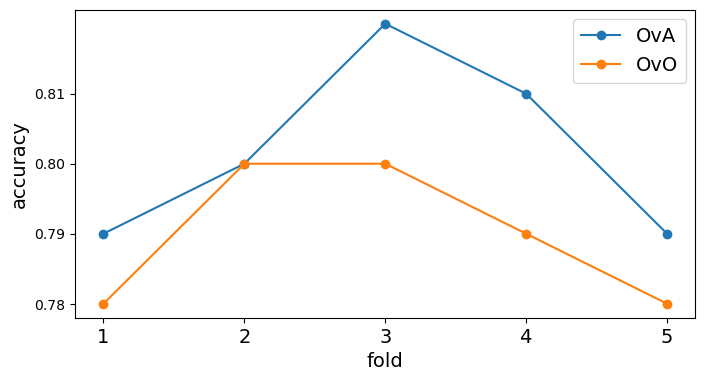

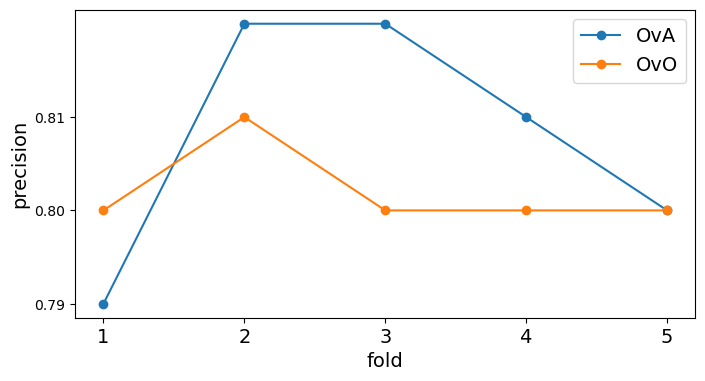

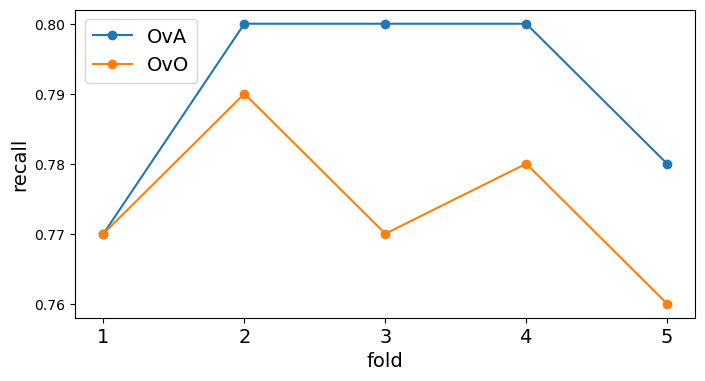

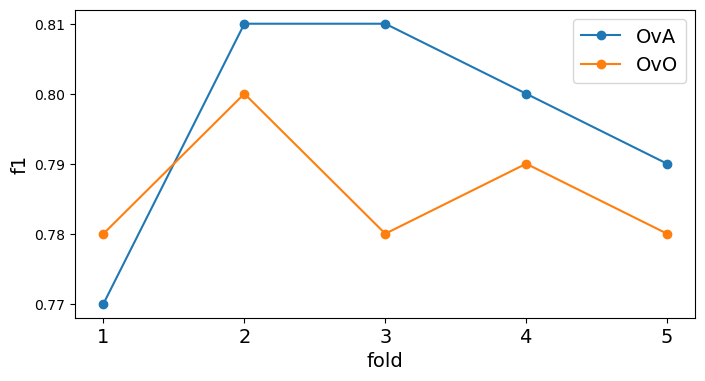

In [26]:
from matplotlib.ticker import FormatStrFormatter

metrics = ['accuracy','precision','recall','f1']

for metric in metrics:
    fig = plt.figure(figsize=(8, 4))
    ova_cv = ova_model_metrics[metric]
    ovo_cv = ovo_model_metrics[metric]
    plt.plot(np.arange(1, 6, 1), ova_cv, '-o', label='OvA')
    plt.plot(np.arange(1, 6, 1), ovo_cv, '-o', label='OvO')
    plt.ylabel(metric, fontsize=14)
    plt.xlabel('fold', fontsize=14)
    plt.legend(fontsize = 14)
    plt.yticks(fontsize=14)
    plt.xticks(np.arange(1, 6, 1), fontsize=14)
    plt.yticks(np.arange(min([ovo_cv.min(), ova_cv.min()]), max([ovo_cv.max(), ova_cv.max()]), 0.01), fontsize=10)
    #plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.savefig(f'CrossValidation_Figures/{metric}.png', dpi=300)
    plt.show()
    

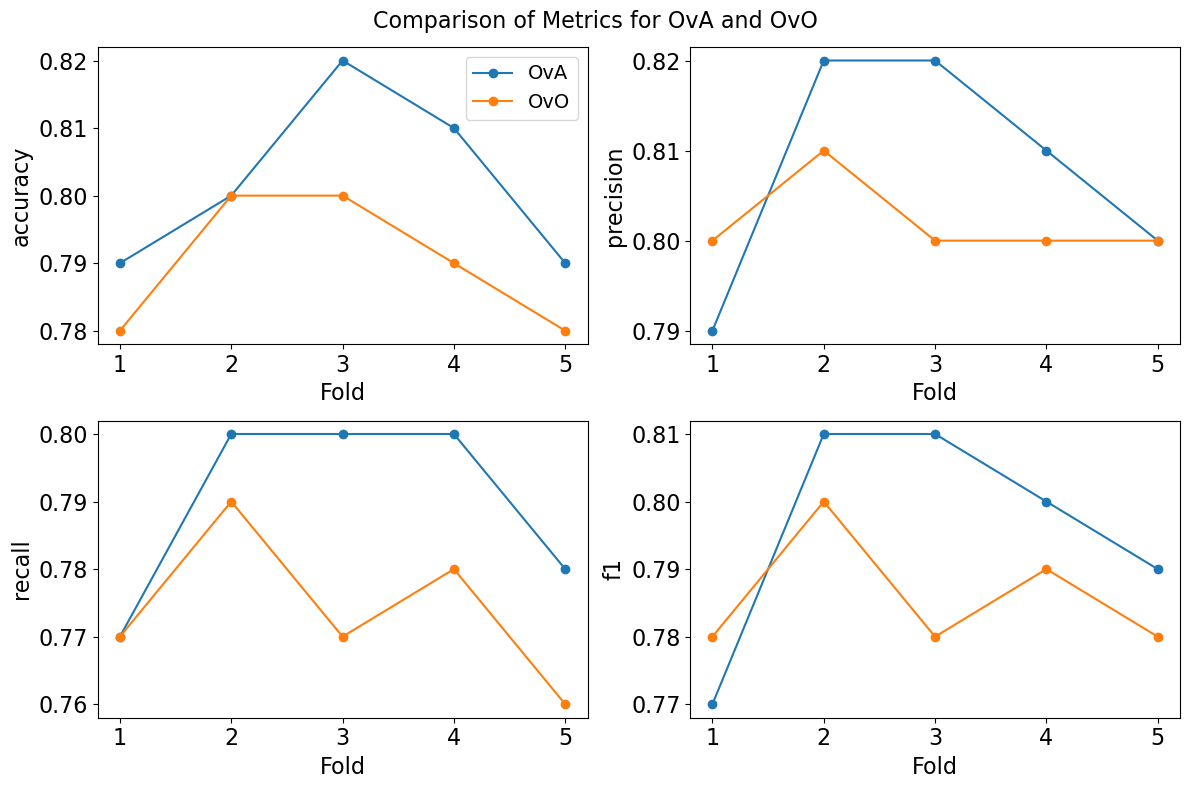

In [27]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming metrics, ova_model_metrics, and ovo_model_metrics are defined as before

# Create a figure with four subplots (2 rows, 2 columns)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# List of metrics
metrics = ['accuracy','precision','recall','f1']

for idx, metric in enumerate(metrics):
    # Get the current subplot
    ax = axes[idx // 2, idx % 2]

    # Get data for the current metric
    ova_cv = ova_model_metrics[metric]
    ovo_cv = ovo_model_metrics[metric]

    # Plot OvA and OvO data
    ax.plot(np.arange(1, 6, 1), ova_cv, '-o', label='OvA')
    ax.plot(np.arange(1, 6, 1), ovo_cv, '-o', label='OvO')

    # Set plot labels, title, and legend (only in the first plot)
    ax.set_ylabel(metric, fontsize=16)
    ax.set_xlabel('Fold', fontsize=16)

    if idx == 0:
        ax.legend(fontsize=14)

    # Set tick sizes
    ax.tick_params(axis='both', which='major', labelsize=16)

    # Set y-axis ticks
    y_min = min([ovo_cv.min(), ova_cv.min()])
    y_max = max([ovo_cv.max()*1.01, ova_cv.max()*1.01])
    ax.set_yticks(np.arange(y_min, y_max, 0.01), fontsize=16)

# Add a title to the entire figure
fig.suptitle("Comparison of Metrics for OvA and OvO", fontsize=16)

# Adjust spacing between subplots
plt.tight_layout()

# Save the entire figure
plt.savefig('CrossValidation_Figures/all_metrics.png', dpi=300)

# Show the entire figure
plt.show()


In [28]:
from scipy.stats import ttest_rel, wilcoxon

In [29]:
metrics = ['accuracy','precision','recall','f1']

df_ttest = pd.DataFrame(columns=['Metric', 'p-value', 'p-value < alpha'], index=range(len(metrics)))
for i, metric in enumerate(metrics):
    OvA_scores = ova_model_validation_results[metric]
    OvO_scores = ovo_model_validation_results[metric]

    t_statistic, p_value = ttest_rel(OvA_scores, OvO_scores)
    
    df_ttest.loc[i, 'Metric'] = metric
    df_ttest.loc[i, 'p-value'] = p_value
    df_ttest.loc[i, 'p-value < alpha'] = 'Yes' if p_value<0.05 else 'No'

In [30]:
df_ttest

,Metric,p-value,p-value < alpha
0,accuracy,0.017655,Yes
1,precision,0.179502,No
2,recall,0.055627,No
3,f1,0.09453,No


In [31]:
metrics = ['accuracy','precision','recall','f1']

df_ttest = pd.DataFrame(columns=['Metric', 'p-value', 'p-value < alpha'], index=range(len(metrics)))
for i, metric in enumerate(metrics):
    OvA_scores = ova_model_validation_results[metric]
    OvO_scores = ovo_model_validation_results[metric]

    diff = [x - y for x, y in zip(OvA_scores, OvO_scores)]
    
    from scipy.stats import shapiro, levene

    _, p_value = shapiro(diff)
    
    df_ttest.loc[i, 'Metric'] = metric
    df_ttest.loc[i, 'p-value'] = p_value
    df_ttest.loc[i, 'p-value < alpha'] = 'Yes' if p_value<0.05 else 'No'

In [32]:
df_ttest

,Metric,p-value,p-value < alpha
0,accuracy,0.541448,No
1,precision,0.83796,No
2,recall,0.73542,No
3,f1,0.97931,No
